In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


PART A

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sns

In [ ]:
from zipfile import ZipFile

with ZipFile("/content/drive/MyDrive/plant-seedlings-classification.zip", 'r') as zObject:
    zObject.extractall(path = "/content/drive/MyDrive/plant-seedlings-classification")

In [ ]:
train_folder = "/content/drive/MyDrive/plant-seedlings-classification/plant-seedlings-classification/train"
data = []
for folder in sorted(os.listdir(train_folder)):
    for file in sorted(os.listdir(train_folder+"/"+folder)):
        data.append((folder, file))

df = pd.DataFrame(data, columns=['Class', 'name'])
df.head()

,Class,name
0,Black-grass,0050f38b3.png
1,Black-grass,0183fdf68.png
2,Black-grass,0260cffa8.png
3,Black-grass,05eedce4d.png
4,Black-grass,075d004bc.png


In [ ]:
images = []
for folder in os.listdir(train_folder):
    for image in os.listdir(train_folder + '/' + folder):
        images.append(os.path.join(train_folder, folder, image))
        
df['img'] = images
df.head()

,Class,name,img
0,Black-grass,0050f38b3.png,/content/drive/MyDrive/plant-seedlings-classif...
1,Black-grass,0183fdf68.png,/content/drive/MyDrive/plant-seedlings-classif...
2,Black-grass,0260cffa8.png,/content/drive/MyDrive/plant-seedlings-classif...
3,Black-grass,05eedce4d.png,/content/drive/MyDrive/plant-seedlings-classif...
4,Black-grass,075d004bc.png,/content/drive/MyDrive/plant-seedlings-classif...


In [ ]:
label_name = df["Class"].unique()
label_name

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

input size 
10


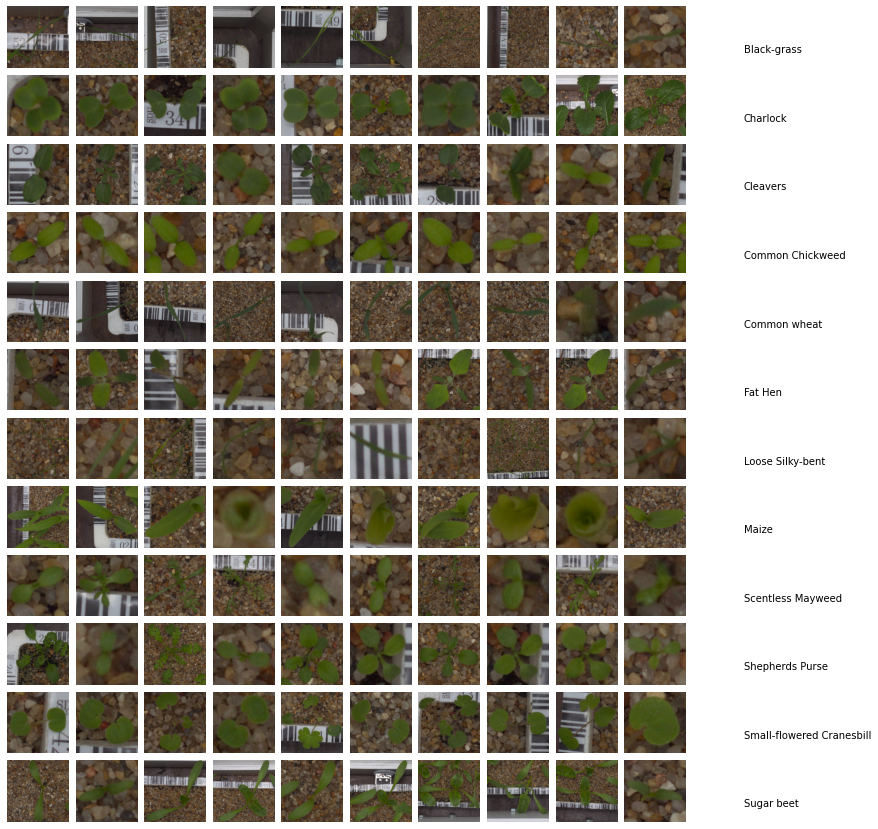

In [ ]:
#print random images with label
from mpl_toolkits.axes_grid1 import ImageGrid
import glob

print("input size ")

size = int(input())
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, size), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_name):
    paths = glob.glob(os.path.join(train_folder, label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=size)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

In [ ]:
df=df.drop(['name'],axis=1)
df.head()

,Class,img
0,Black-grass,/content/drive/MyDrive/plant-seedlings-classif...
1,Black-grass,/content/drive/MyDrive/plant-seedlings-classif...
2,Black-grass,/content/drive/MyDrive/plant-seedlings-classif...
3,Black-grass,/content/drive/MyDrive/plant-seedlings-classif...
4,Black-grass,/content/drive/MyDrive/plant-seedlings-classif...


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Class']= label_encoder.fit_transform(df['Class'])
  
df['Class'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
#Create X & Y from the DataFrame
x=df['img']
y=df['Class']

In [ ]:
#Unify shape of all the images
X=[]
for i in x:
    img = cv2.imread(str(i))
    reimg = cv2.resize(img,(180,180))
    normimg = reimg
    X.append(reimg)
    

In [ ]:
X = np.array(X)
y=np.array(y)

In [ ]:
#train test slipt
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=50)

In [ ]:
#normalizing data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
print(X_train_scaled.shape)
print(y_train.shape)

(3325, 180, 180, 3)
(3325,)


Build convolutional neural network

In [ ]:
num_classes = 12

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
104/104 [==============================] - 11s 26ms/step - loss: 2.3195 - accuracy: 0.1768
Epoch 2/30
104/104 [==============================] - 2s 23ms/step - loss: 1.8203 - accuracy: 0.3341
Epoch 3/30
104/104 [==============================] - 2s 23ms/step - loss: 1.5253 - accuracy: 0.4406
Epoch 4/30
104/104 [==============================] - 2s 23ms/step - loss: 1.2750 - accuracy: 0.5251
Epoch 5/30
104/104 [==============================] - 2s 23ms/step - loss: 1.0453 - accuracy: 0.6162
Epoch 6/30
104/104 [==============================] - 2s 23ms/step - loss: 0.8303 - accuracy: 0.6926
Epoch 7/30
104/104 [==============================] - 2s 23ms/step - loss: 0.6339 - accuracy: 0.7714
Epoch 8/30
104/104 [==============================] - 2s 23ms/step - loss: 0.4477 - accuracy: 0.8424
Epoch 9/30
104/104 [==============================] - 2s 23ms/step - loss: 0.3171 - accuracy: 0.8938
Epoch 10/30
104/104 [==============================] - 2s 23ms/step - loss: 0.2438 - accur

In [ ]:
model.evaluate(X_test_scaled,y_test)

45/45 [==============================] - 1s 17ms/step - loss: 5.5683 - accuracy: 0.4098


[5.568295955657959, 0.40982455015182495]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (40.98%) indicating overfitting.

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

45/45 [==============================] - 1s 12ms/step


array([[-20.788445  ,  29.219795  ,  -8.917516  , ..., -13.352645  ,
         13.680225  ,  -3.6399226 ],
       [ -3.9400837 ,   3.4227345 ,  -0.58303493, ...,  14.425612  ,
         14.760635  ,  -9.568741  ],
       [  9.328684  ,   3.4410367 , -13.011127  , ...,  -1.4475223 ,
        -10.529425  ,   2.8501697 ],
       ...,
       [ -3.169429  ,  -4.779949  ,   4.790789  , ...,   2.3243752 ,
          4.0729904 ,   2.7990732 ],
       [ 21.004208  ,   5.8891726 , -10.127544  , ...,   3.0802145 ,
         23.237448  ,  29.125364  ],
       [ -5.8161616 ,  11.31214   ,  -7.7001004 , ..., -10.469837  ,
        -18.280481  ,  -2.0458932 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([1.8534024e-22, 9.6888506e-01, 2.6512396e-17, 6.4257086e-19,
       1.8575316e-19, 4.5358134e-22, 7.2953015e-17, 2.1657179e-19,
       3.1114774e-02, 3.1426499e-19, 1.7279167e-07, 5.1937125e-15],
      dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

11

PART B

In [5]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 5.2 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=847e1a31fdbee5b561958ca1069e0a3db4e3e2a642a17b127afebd64bd53ee83
  Stored in directory: /root/.cache/pip/wheels/65/9b/15/cb1e6b279c14ed897530d15cfd7da8e3df8a947e593f5cfe59
Successfully built tflearn


In [52]:
 #Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data()

In [53]:
# View number of samples in data sets
print ('x has shape {}'.format(x.shape))
print ('y has shape {}'.format(y.shape))

x has shape (1360, 224, 224, 3)
y has shape (1360,)


In [54]:
#Print count of each class from y
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

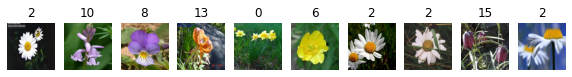

In [55]:
# visualizing 10 images in the dataset and their labels

N=10

plt.figure(figsize=(N, 1))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(x[i], cmap="gray")  # greens, reds, blues, rgb
    plt.title("{}".format(y[i]))
    plt.axis('off')
plt.show()

In [56]:
#Select any image from the dataset and assign it to a variable
temp = x[8]
temp

array([[[0.4627451 , 0.5058824 , 0.30588236],
        [0.43137255, 0.44313726, 0.24705882],
        [0.4       , 0.3764706 , 0.19215687],
        ...,
        [0.09803922, 0.14117648, 0.09803922],
        [0.14901961, 0.2       , 0.14117648],
        [0.15686275, 0.21568628, 0.14117648]],

       [[0.38431373, 0.4392157 , 0.2627451 ],
        [0.38431373, 0.40784314, 0.23529412],
        [0.25490198, 0.23921569, 0.08627451],
        ...,
        [0.14117648, 0.18039216, 0.13725491],
        [0.09803922, 0.14117648, 0.09019608],
        [0.1882353 , 0.23921569, 0.1764706 ]],

       [[0.4392157 , 0.49803922, 0.3647059 ],
        [0.26666668, 0.29803923, 0.16078432],
        [0.13725491, 0.13725491, 0.02352941],
        ...,
        [0.13333334, 0.16078432, 0.12941177],
        [0.12941177, 0.16470589, 0.12941177],
        [0.11372549, 0.15294118, 0.10980392]],

       ...,

       [[0.03137255, 0.02352941, 0.07450981],
        [0.14117648, 0.12941177, 0.13725491],
        [0.39215687, 0

In [57]:
#Transform the image into grayscale format and display the same
img = tf.image.rgb_to_grayscale(temp)
img

<tf.Tensor 'rgb_to_grayscale_6:0' shape=(224, 224, 1) dtype=float32>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

In [59]:
# DATA SET SHAPE AND SIZE

print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN

print('\nTesting data : ', X_test.shape, y_test.shape) # TEST


Training data :  (1088, 224, 224, 3) (1088,)

Testing data :  (272, 224, 224, 3) (272,)


In [63]:
# Flatten the images data 

# Training data
x_train = []
for i in X_train:
    x_train.append(i.flatten())

# Testing data
x_test = []
for i in X_test:
    x_test.append(i.flatten())


# Print data lengths

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(y_train))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(y_test))


 Training data: 1088

 Training Target data: 1088

 Testing data: 272

 Testing Target data: 272


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(x_train, y_train)

y_pred = NB.predict(x_train)
NB_Accuracy_Train=accuracy_score(y_train, y_pred, normalize = True)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred = NB.predict(x_test)
NB_Accuracy_Test=accuracy_score(y_test, y_pred, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.5119485294117647
Test Accuracy :  0.3639705882352941


In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(x_train, y_train)

y_pred = KNN.predict(x_train)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(x_test)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.38235294117647056
Test Accuracy :  0.2867647058823529


CNN Model

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

In [92]:
# DATA SET SHAPE AND SIZE

print('\nTraining data : ', X_train.shape, y_train.shape)  # TRAIN

print('\nTesting data : ', X_test.shape, y_test.shape) # TEST


Training data :  (1088, 224, 224, 3) (1088,)

Testing data :  (272, 224, 224, 3) (272,)


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (224, 224, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 10, activation = 'softmax')) 

In [94]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 224, 224, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                     

In [95]:
MODEL1=model_1.fit(X_train, y_train, epochs = 15, validation_data = (X_test, y_test), initial_epoch=0)

Train on 1088 samples, validate on 272 samples
Epoch 1/15
1088/1088 [==============================] - ETA: 0s - loss: nan - acc: 0.0506

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 8s 8ms/sample - loss: nan - acc: 0.0506 - val_loss: nan - val_acc: 0.0846
Epoch 2/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val_loss: nan - val_acc: 0.0846
Epoch 3/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val_loss: nan - val_acc: 0.0846
Epoch 4/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val_loss: nan - val_acc: 0.0846
Epoch 5/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val_loss: nan - val_acc: 0.0846
Epoch 6/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val_loss: nan - val_acc: 0.0846
Epoch 7/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val_loss: nan - val_acc: 0.0846
Epoch 8/15
1088/1088 [==============================] - 2s 2ms/sample - loss: nan - acc: 0.0524 - val

In [112]:
X_train[0]

array([[[0.3882353 , 0.28627452, 0.23529412],
        [0.39215687, 0.2901961 , 0.23921569],
        [0.39607844, 0.29411766, 0.24313726],
        ...,
        [0.29411766, 0.20784314, 0.16470589],
        [0.29411766, 0.20784314, 0.16470589],
        [0.29411766, 0.20784314, 0.16470589]],

       [[0.39215687, 0.2901961 , 0.23921569],
        [0.39607844, 0.29411766, 0.24313726],
        [0.4       , 0.29803923, 0.24705882],
        ...,
        [0.29803923, 0.21176471, 0.16862746],
        [0.29803923, 0.21176471, 0.16862746],
        [0.29803923, 0.21176471, 0.16862746]],

       [[0.40392157, 0.3019608 , 0.2509804 ],
        [0.40392157, 0.3019608 , 0.2509804 ],
        [0.40392157, 0.3019608 , 0.2509804 ],
        ...,
        [0.30980393, 0.22352941, 0.18039216],
        [0.30588236, 0.21960784, 0.1764706 ],
        [0.30588236, 0.21960784, 0.1764706 ]],

       ...,

       [[0.19607843, 0.07058824, 0.02745098],
        [0.19607843, 0.07058824, 0.02745098],
        [0.19607843, 0